In [1]:
import numpy as np
import pandas as pd
import geopy as geo
from shapely.geometry import shape, Point
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
violations = pd.read_parquet('resources/extended_dataset.parquet')

In [60]:
violations.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,...,Re-inspection,Community,Neighborhood,Ward,Precinct,Violation IDs,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity
0,2320519,SALAM RESTAURANT,SALAM RESTAURANT,2002822,Restaurant,High,4634-4636 N KEDZIE AVE,60625,2019-10-25,Complaint,...,True,ALBANY PARK,"NORTH PARK,ALBANY PARK",33,27,[None],0,0,0,0
1,2320509,TAQUERIA EL DORADO,TAQUERIA EL DORADO,2694960,Restaurant,High,2114 W LAWRENCE AVE,60625,2019-10-25,License,...,True,LINCOLN SQUARE,LINCOLN SQUARE,47,38,"[3, 5, 25, 50, 53, 53, 56, 58]",8,2,1,5
2,2320412,"DANTE'S PIZZA,INC.",DANTE'S PIZZA,2092884,Restaurant,High,3028 W ARMITAGE AVE,60647,2019-10-24,Canvass,...,False,LOGAN SQUARE,LOGAN SQUARE,32,22,"[38, 47, 53, 55, 58, 60]",6,0,0,6
3,2320430,LAO PENG YOU LLC,LAO PENG YOU,2694477,Restaurant,High,2020 W CHICAGO,60622,2019-10-24,License,...,True,WEST TOWN,UKRAINIAN VILLAGE AND EAST VILLAGE,2,21,"[3, 48, 51, 55, 58]",5,1,0,4
4,2320384,ARBOR,ARBOR,2363029,Restaurant,High,2545 W DIVERSEY AVE,60647,2019-10-24,Others,...,False,LOGAN SQUARE,LOGAN SQUARE,32,1,"[14, 25, 41, 47, 48, 55, 56, 57, 58, 60]",10,1,1,8


In [90]:
df_violation_ids_no_reinspection = violations[violations['Re-inspection'] == False]
nb_violations_by_date = df_violation_ids_no_reinspection[['Inspection Date', 'Nb Violations', 'Nb Violations of high severity', 'Nb Violations of medium severity', 'Nb Violations of low severity']].groupby('Inspection Date').sum()
nb_violations_by_date.head()

,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity
Inspection Date,,,,
2010-01-04,16,0,3,13
2010-01-05,221,4,18,199
2010-01-06,264,13,37,214
2010-01-07,170,5,9,156
2010-01-08,116,4,8,104


In [91]:
nb_violations_by_month = nb_violations_by_date.copy().reset_index()
nb_violations_by_month['Inspection Date'] = nb_violations_by_month['Inspection Date'].apply(lambda x: x.month)
nb_violations_by_month.rename(columns={'Inspection Date' : 'Inspection Month'}, inplace=True)
nb_violations_by_month = nb_violations_by_month.groupby('Inspection Month').mean()
nb_violations_by_month.head()

,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity
Inspection Month,,,,
1,219.694581,18.551724,21.103448,180.039409
2,223.502703,20.772973,21.924324,180.805405
3,224.861751,20.248848,22.225806,182.387097
4,217.129032,19.986175,22.225806,174.917051
5,236.607477,22.434579,23.570093,190.602804


In [131]:
nb_violations_by_month.to_parquet('resources/violations_per_month.parquet')

Text(0.5, 1.0, 'Mean number of violations by inspection for each month')

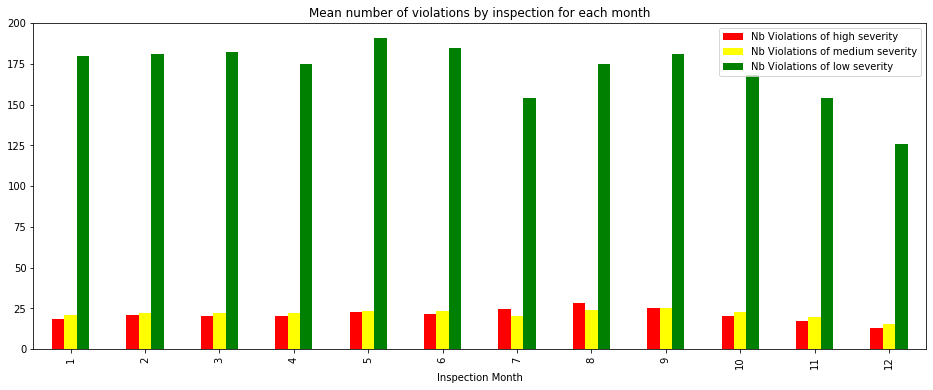

In [92]:
nb_violations_by_month[['Nb Violations of high severity', 'Nb Violations of medium severity', 'Nb Violations of low severity']].plot.bar(color=['red', 'yellow', 'green'], figsize=(16,6))
plt.title("Mean number of violations by inspection for each month")

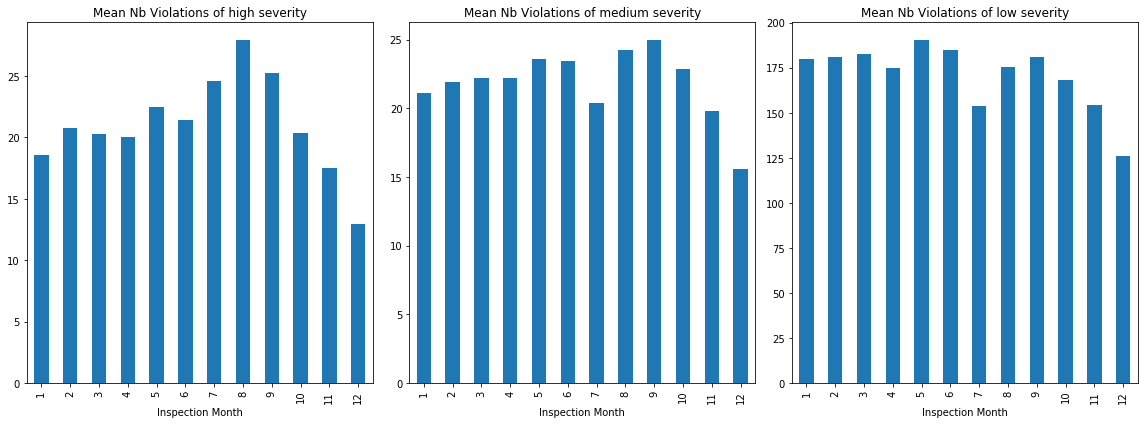

In [94]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
nb_violations_by_month['Nb Violations of high severity'].plot.bar(ax=ax1,title = 'Mean Nb Violations of high severity')
nb_violations_by_month['Nb Violations of medium severity'].plot.bar(ax=ax2,title = 'Mean Nb Violations of medium severity')
nb_violations_by_month['Nb Violations of low severity'].plot.bar(ax=ax3,title = 'Mean Nb Violations of low severity')
plt.tight_layout()